In [1]:
# ~~~~~~~~~~~~~~ Libraries
import sys, os
import mne # Python package for processing and analyzing electrophysiological data
import numpy as np
from glob import glob # look for all the pathnames matching a specified pattern according to the rules
import matplotlib.pyplot as plt
from mne.preprocessing import ICA # ICA (Independent Component Analysis) algorithm, which is for artifact removal
import json

# Average time series for one channel

Reading /viper/u/kazma/MINT/data/interim/visual/sub-01_ses-01/epochs-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1260 matching events found
No baseline correction applied
0 projection items activated


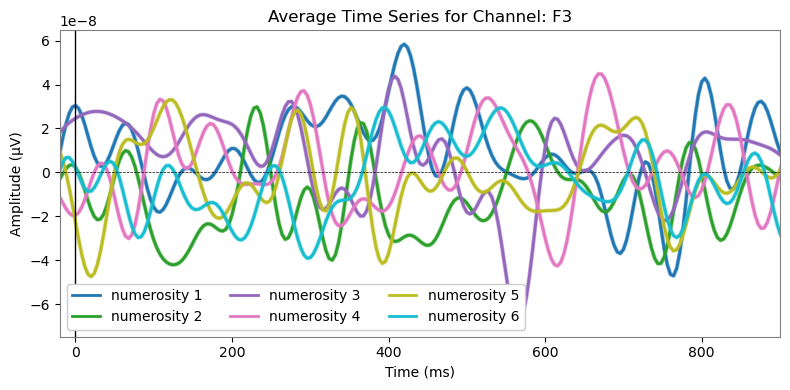

In [53]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt

# Set the working directory
os.chdir('/u/kazma/MINT/data/interim/visual/sub-01_ses-01')

# Load epochs
epochs = mne.read_epochs('epochs-epo.fif', preload=True)

# Get the condition names
condition_names = list(epochs.event_id.keys())
evoked_list = []

# Compute the averaged epoch for each condition and each channel
for condition in condition_names:
    evoked = epochs[condition].average()  # Average the epochs for the condition
    evoked_list.append(evoked)

# Store 6 vectors, representing averaged vector for each condition
averaged_data = {}

# Specify the channel to plot (e.g., channel name 'Cz')
channel_name = 'F3'  # Replace with the channel of your choice

# Figure
plt.figure(figsize=(8, 4))

# Define colors for the conditions
colors = plt.cm.tab10(np.linspace(0, 1, 6))

for i, evoked in enumerate(evoked_list):
    # Extract data for the specified channel
    channel_index = evoked.ch_names.index(channel_name)  # Get index of the channel
    channel_data = evoked.data[channel_index]  # Get the data for the specific channel
    times = evoked.times * 1000  # Convert time to milliseconds

    # Store the data
    averaged_data[condition_names[i]] = channel_data
    
    # Plot the channel data
    plt.plot(times, channel_data, color=colors[i], linewidth=3, alpha=0.5) 
    plt.plot(times, channel_data, label=condition_names[i], color=colors[i], linewidth=2)  # Plot time series

# Customize the plot
plt.title('Average Time Series for Channel: ' + channel_name)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (µV)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.axvline(0, color='black', linestyle='-', linewidth=1)  # Add a vertical line at t=0
plt.xlim(-20, 900)  # Set x-axis limits
# plt.ylim(-2.0e-8, 2.0e-8)  # Set y-axis limits
plt.legend(ncol=3, loc='lower left', framealpha=1)

# Set the box line color to gray
ax = plt.gca()
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

plt.tight_layout()
plt.show()



## Time-resolved decdoing

### vector = [number of channels * 5] for numerosity X

In [54]:

print(epochs.ch_names)

['Fz', 'F3', 'F7', 'F9', 'FC5', 'POz', 'C3', 'T7', 'TP9', 'CP5', 'P7', 'P3', 'Pz', 'O1', 'O2', 'P8', 'P4', 'CP6', 'TP10', 'T8', 'C4', 'Oz', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'FC4', 'CP4', 'FC3', 'CP3', 'eyeV', 'eyeH']
